# **Palavras Mais Frequentes no Twitter**

Neste projeto iremos analisar as **Palavras mais Frequentes no Twitter em relação à Segunda Volta das Eleições Presidenciais 2021 no Perú**. Um dos candidatos é o senhor "**Pedro Castillo**" do partido "**Perú Libre**", e a outra candidata é a senhora "**Keiko Fujimori**" do partido político "**Fuerza Popular**". Esses são os termos que utilizaremos para fazer nossa busca na base de dados do Twitter.

## Coleta de Dados

O Twitter possui uma API que facilita o trabalho de extrair dados. Para estabelecer uma conexão com essa API e pegar as informações, precisamos ter uma conta de desenvolvedor que, por sua vez, requer que tenhamos uma conta do Twitter, e utilizar a biblioteca `TwitterSearch`. Então:

- Criamos uma conta no Twitter de usuário padrão: https://twitter.com
- Aplicamos para uma conta de desenvolvedor: https://developer.twitter.com/en/apply-for-access 
- Criamos um projeto e pegamos as chaves do consumidor e de acesso aos tokens.
- Trabalhamos com a biblioteca `TwitterSearch`.

**Documentação**:

* Da `TwitterSearch`, uma biblioteca para iterar facilmente os tweets encontrados pela API do Twitter: https://pypi.org/project/TwitterSearch/

* Da classe `TwitterSearchOrder`, que atua principalmente como um contêiner simples para a configuração de todos os parâmetros disponíveis pela API de pesquisa do Twitter: https://twittersearch.readthedocs.io/en/latest/advanced_usage_tso.html

In [1]:
# Instala a biblioteca TwitterSearch
!pip install TwitterSearch

In [ ]:
from TwitterSearch import *
import json

# Definindo as 4 chaves que nos permitirão fazer a conexão com a API do Twitter
API_key = "xxxxx"
API_secret_key = "xxxxx"
access_token = "xxxxx"
access_token_secret = "xxxxx"

try:
    
    # Atribuímos as chaves
    ts = TwitterSearch(
        consumer_key = API_key,
        consumer_secret = API_secret_key,
        access_token = access_token,
        access_token_secret = access_token_secret    
    )
    
    # Estabelecemos os padrões para pesquisa no Twitter
    tso = TwitterSearchOrder()
    tso.set_keywords(["Perú Libre", "Castillo", "Fuerza Popular", "Keiko"], or_operator = True)
    tso.set_language("es")
    
    # Extraimos as informações
    for tweet in ts.search_tweets_iterable(tso):
        # Salvamos em um arquivo .json
        with open("tweets.json", "a+") as output:
            # Em cada iteação criamos um dicionário
            data = {"Data": tweet["created_at"],
                   "Id_usuario": tweet["id_str"],
                   "Usuario": tweet["user"]["screen_name"],
                   "Tweet": tweet["text"]}
            print(data)
            output.write("{}\n".format(json.dumps(data)))
            
except TwitterSearchException as e:
    print(e)            

## **Pré-processamento de Dados de Texto**

### **Lendo o arquivo JSON como um DataFrame**

Para explorar os dados carregamos o arquivo JSON criado anteriormente, como um DataFrame.

In [2]:
# Importando a biblioteca Pandas
import pandas as pd

In [3]:
# Lendo o arquivo "tweets.json" como um DataFrame
df = pd.read_json('tweets.json', lines = True)

In [4]:
# Visualizando as 10 primeiras linhas
df.head(10)

,Data,Id_usuario,Usuario,Tweet
0,Wed Apr 21 23:11:22 +0000 2021,1385008288144793600,xxprincipitoxx,RT @LalaFernanU: @Caretas Mañana saldrá Keiko ...
1,Wed Apr 21 23:11:22 +0000 2021,1385008285443629056,BerthaArmijo7,RT @jessicavtg: Una parlanchina congresista el...
2,Wed Apr 21 23:11:21 +0000 2021,1385008281769418752,Jhi_bs,RT @Gestionpe: Vladimir Cerrón: “La izquierda ...
3,Wed Apr 21 23:11:20 +0000 2021,1385008279080906752,SergeiParshekov,RT @willaxtv: #Combutters | Phillip Butters: “...
4,Wed Apr 21 23:11:20 +0000 2021,1385008278015516672,anyce18,RT @RLApresidente: Los más de 1 MILLÓN de vene...
5,Wed Apr 21 23:11:20 +0000 2021,1385008277801644032,Alonso88932549,"RT @noakeikope: Con ustedes, los FujiTerrucos ..."
6,Wed Apr 21 23:11:20 +0000 2021,1385008277755400192,PochaSesarego,RT @MilkoIbanez: @raullabarthe ¿Cual es la cor...
7,Wed Apr 21 23:11:20 +0000 2021,1385008277424152576,i_biolive,@Gestionpe El tromercio en modo keiko...
8,Wed Apr 21 23:11:19 +0000 2021,1385008275167580160,mendezc_daniela,RT @Gestionpe: Vladimir Cerrón: “La izquierda ...
9,Wed Apr 21 23:11:18 +0000 2021,1385008272298717184,GersinB,[Duda👇] | La República https://t.co/Oow7gGmUl3...


In [5]:
# Visualizando as 10 últimas linhas
df.tail(10)

,Data,Id_usuario,Usuario,Tweet
17990,Wed Apr 21 20:43:25 +0000 2021,1384971052929925120,estupidemia,RT @carden_alonso: Si gana Castillo seremos co...
17991,Wed Apr 21 20:43:24 +0000 2021,1384971051935965184,BestiasAlVolant,RT @HEISENBERGPER: @edumaldi Qué inocencia la ...
17992,Wed Apr 21 20:43:24 +0000 2021,1384971050732171264,SaraRata,RT @Alonso_GD: Yo insisto en que no estoy en u...
17993,Wed Apr 21 20:43:24 +0000 2021,1384971050467962880,FaLaRosa14,RT @raullabarthe: Los que se rasgaron las vest...
17994,Wed Apr 21 20:43:24 +0000 2021,1384971050446954496,jvier0,RT @edumaldi: En sencillo:\n✏️Con Castillo pod...
17995,Wed Apr 21 20:43:24 +0000 2021,1384971048672710656,ConsueloGarcaC1,@Alberto43829093 @Gestionpe Gracias PADRE Cele...
17996,Wed Apr 21 20:43:24 +0000 2021,1384971048337149952,RocaYrene,RT @DiarioDeCurwen: En medio de la pandemia y ...
17997,Wed Apr 21 20:43:23 +0000 2021,1384971044360962048,lumezgo77,"RT @Alebenasem: En Venezuela,luego de 22 años ..."
17998,Wed Apr 21 20:43:20 +0000 2021,1384971035209052160,MPCSOLUTION,Se quieren tumbar a Castillo?\nDenle mas panta...
17999,Wed Apr 21 20:43:20 +0000 2021,1384971034323992576,JulioCesar_Ruiz,"RT @vcabalg: 1998, los ingenuos venezolanos: ""..."


In [6]:
# Imprimindo a forma do DataFrame
df.shape

(18000, 4)

Devido aos retweets, provavelmente temos muitas postagens repetidas em nosso conjunto de dados, para evitar isto removemos os tweets duplicados.

In [7]:
# Removendo os tweets duplicados
df.drop_duplicates(['Tweet'], inplace = True)

In [8]:
# Imprimindo a forma do DataFrame
df.shape

(6952, 4)

Temos um dataset com 6952 registros e 4 colunas que possuim informações do momento de criação dos tweets, que correspondem ao dia 21 de Abril de 2021, do id do usuário, do nome de usuário e do tweet.

### Trabalhando com o Natural Language Toolkit (NLTK)

**Importando a biblioteca NLTK**

In [9]:
# Instalando o NLTK
#!pip install nltk

# Importando a biblioteca NLTK
import nltk

# Fazemos download para importar os corpos que são as palavras para cada linguagem
#nltk.download() 

**Trabalhando com um objeto do tipo Texto**

Um objeto `nltk.text` nada mais é do que uma sequência ordenada de tokens, sendo esta a unidade mínima de um texto, simplesmente palavras ou sinais de pontuação. Convertiremos todos os tweets em um único objeto do tipo Texto para poder utilizar os métodos disponíveis para ele, em uma exploração inicial do texto.

In [10]:
from nltk.tokenize import TweetTokenizer

string = " ".join([i for i in df.Tweet])

# Tokens
tweet_tokenize = TweetTokenizer()
lista_de_tokens = tweet_tokenize.tokenize(string)
print("Tokens:", lista_de_tokens[:10])

# Texto
texto = nltk.Text(lista_de_tokens)
print("\nTexto:", texto)

Tokens: ['RT', '@LalaFernanU', ':', '@Caretas', 'Mañana', 'saldrá', 'Keiko', 'a', 'decir', ':']

Texto: <Text: RT @LalaFernanU : @Caretas Mañana saldrá Keiko a...>


* **Método similar**: Encontra outras palavras que aparecem nos mesmos contextos da palavra especificada; lista as palavras mais semelhantes primeiro.

In [11]:
texto.similar("castillo", num = 100)

keiko no que rt cerrón y si perú la el eso cerron gobierno lo de
estado fujimori a q es todo él se presidente país ella ahora partido
por vida ver esto los todos alguien candidato comunismo congreso qué
años usted l poder evo c pero decir votar porque peru soto izquierda
con yo ser comunista así pueblo plan ya este lima japón como quien tu
ti nadie acuerdo en ganar mas terrorismo e paso s muerte ca venezuela
ellos le nada corrupto hacer favor verdad cast mujica hecho más para
un pedro apoyo solo voto miedo punto maduro vero


In [12]:
texto.similar("keiko", num = 100)

castillo que no rt la y cerrón el eso si perú todo cerron a todos qué
lo de los alguien votar se es gobierno fujimori usted ella ver
izquierda ser años él vida ya esto evo japón hacer presidente en q
estado este yo por lima solo l soto ellos nada c ahora así gente tu
decir ganar venezuela con corrupción un como pero alberto porque p
quien muerte verdad me está le ese leer terroristas información s
mentir derecha favor ti nadie ruta hecho ni uno e hablar twitter
maduro bolivia sendero acuerdo vizcarra abril porky odio hoy su


As palavras relacionadas com "Castillo" e "Keiko" são: "Venezuela", "Bolivia", "Maduro", "Evo", "sendero", "comunismo", "terrorismo", "Cerrón", "corrupción", "Alberto", "Fujimori". Os termos "Venezuela", "Bolivia", "Maduro", "Evo", "sendero", "comunismo", "terrorismo" e "Cerrón" estão fortemente relacionados à Castillo pelas ideias radicais do partido dele, seu presunto vínculo com o Movadef, a ingerência de Evo Morales a favor de Castillo, entre outros. Ele considera que a Venezuela vive um regime democrático. Um personagem muito polêmico é Cerrón, fundador daquele partido e único autor do ideario de Perú Libre, que tem muito destaque apesar de não ser ele o candidato. O termo "corrupción" está fortemente relacionado à Keiko Fujimori e ao pai dela, "Alberto Fujimori", ex-presidente do Perú, mas também é referido ao Vladimir Cerrón. Apesar de não ter aparecido aqui, o termo "dictadura" está relacionado tanto a Castillo quanto a Alberto Fujimori, cujo governo implantou uma ditadura.

* **Método collocations**: Colocações são expressões de várias palavras que comumente ocorrem simultaneamente.

In [13]:
texto.collocations(num = 25)

Pedro Castillo; Keiko Fujimori; Perú Libre; votar por; @ConClau3
@BelenAline1; @BelenAline1 @MrDoctorOficial; Evo Morales; PEDRO
CASTILLO; @YaRov_Buuren @ConClau3; PADRE Celestial; Fuerza Popular;
Gracias PADRE; segunda vuelta; Celestial porque; Vladimir Cerrón;
Keyko JUNTO; López Aliaga; Vargas Llosa; por Keiko; Poder Judicial;
todos los; Ministerio Público; Rafael López; mal menor; Zaira Arias


Podemos observar que os termos que costumam aparecer juntos são os nomes dos candidatos à presidência de ambos partidos: Pedro Castillo, Keiko Fujimori; os nomes dos partidos: Perú Libre, Fuerza Popular; nomes de personagens que estão se envolvendo nas eleições com suas opiniões: Evo Morales, Vargas Llosa; nomes de personagens pertencentes ao partido Perú Libre: Vladimir Cerrón, Zaira Arias. Outros termos que costumam aparecer juntos são: "mal menor", porque a maioria dos peruanos não nos sentimos representados por nenhuma das duas opções, e "Poder Judicial", relacionado à Keiko que é acusada de supostamente ter recebido contribuições ilegais em suas campanhas presidenciais anteriores.

* **Método concordance**: Imprime uma concordância por palavra com a janela de contexto especificada. A correspondência de palavras não diferencia maiúsculas de minúsculas.

In [14]:
texto.concordance("keiko")

Displaying 25 of 1981 matches:
LalaFernanU : @Caretas Mañana saldrá Keiko a decir : " No se meta en mi país Mu
ers | Phillip Butters : “ Esto no es Keiko contra Castillo , es todo el Perú co
llabarthe ¿ Cual es la corrupción de Keiko ? . Que yo sepa todos son inocentes 
no … @Gestionpe El tromercio en modo keiko ... [ Duda 👇 ] | La República https:
arosarco : Poder Judicial autorizó a Keiko Fujimori a viajar al interior del pa
e entromete en la campaña apoyando a Keiko Fujimori " , ok ? https://t.co/cc… R
ría ser inha … RT @Angelo211322869 : Keiko Fujimori nos ofrece su experiencia ,
do ? RT @el_analista2020 : Asumo que Keiko tiene asegurados los 7 millones de v
o defiende a Evo Morales y le dice a Keiko Fujimori que “ vaya a candidatear a 
a Cas … RT @bornto2000 : El taper de Keiko me llega altamente , solo no quiero 
co/kSSwXTjf6S RT @diariocorreo : 🗣 💬 Keiko Fujimori : “ Señor Castillo , ¿ va a
apá Alberto en los sótanos del SIN . Keiko es sinónimo de rencor y ven … RT @Pa
 ven … RT

In [15]:
texto.concordance("castillo")

Displaying 25 of 3115 matches:
" anuncio " oficalmente q de ganar Castillo hay " golpe de estado " a finales 
utters : “ Esto no es Keiko contra Castillo , es todo el Perú contra el comuni
n la Covid - 19 . Además , ¿ Pedro Castillo podría ser inha … RT @Angelo211322
FP . ¿ O no ? RT @TheMaxxProject : castillo no necesita el apoyo de juntos por
res mi rey , aqui el problema es q castillo figura como gerente de una constru
ermano , amigo y compañero Gonzalo Castillo . https://t.co/twOwdWRn8J RT @info
rmateperu : Gonzáles Izquierdo : “ Castillo está proponiendo cosas que se hici
a Sr Cerron , por el bien de Pedro Castillo , el es el candidato y para nada p
reo : 🗣 💬 Keiko Fujimori : “ Señor Castillo , ¿ va a cerrar usted el Congreso 
 ¿ Piensas votar por el terrorista Castillo ? : Una vez se instaura un gobiern
e … RT @Agata70837779 : Si el Sr . Castillo a mentido en su hoja de vida . De 
olasLucar O sea mi voto se fue con Castillo ? Glup ! ! wuuuaaaaaaaaaaaaa ! @la
rá será VLADIMIR CERR

Podemos observar que algumas pessoas relacionam a Keiko Fujimori com a "corrupción" e a Pedro Castillo com "comunismo", "terrorismo" e "golpe de estado". Algumas pessoas acham que Keiko é o "mal menor", apesar dos danos que seu "rencor" causou ao país por não ter aceitado que perdeu a última eleição presidencial, no 2016.

**Pré-processamento dos Tweets**

O pré-processamento de cada tweet consistirá em remover os caracteres desnecessários de cada um deles, como são os urls, @(manipuladores do tweet), sinais de pontuação, etc, colocar as palavras do tweet em minúscula, remover aquelas que são irrelevantes (Stopwords), colocar as que restaram sem acentos, isto nos permitirá mais na frente calcular a frequência para uma mesma palavra sem ter em conta se foi escrita de um jeito diferente (algum caractere em maiúscula ou sem acento, etc), remover os emojis, remover algumas palavras desnecessárias que não estão incluídas nas Stopwords e, finalmente, eliminar palavras segundo certos radicais.

Um outro recurso interessante que é utilizado no pré-processamento de dados de texto é o Lemmatization, que é o processo de deflexionar uma palavra para determinar o seu "Lema". Porém, é um recurso que não está disponível para o idioma espanhol no NLTK.

In [16]:
import re
import unicodedata
from nltk.stem import SnowballStemmer

# Função que realiza o pré-processamento
def pre_processing(string, remover_1, remover_2): 
    
    # Remove caracteres desnecessários de uma string
    to_match = ["http\S+", "@\S+", "[¡!$%#^&*()_+<>¿?/\\\.=,;:'|0-9\-\[\]]", '"', '“', '”']
    string = re.sub('|'.join(to_match), " ", string)

    # Coloca a string em minúscula
    string = string.lower()

    # Lista contendo as Stopwords
    stopwords = set(nltk.corpus.stopwords.words("spanish"))
    
    # Remove as Stopwords de uma string
    string = " ".join([i for i in string.split() if not i in stopwords])
    
    # Remove acentos de uma string
    nfkd_form = unicodedata.normalize('NFKD', string)    
    string = u"".join([c for c in nfkd_form if not unicodedata.combining(c)])
    
    # Remove emojis de uma string
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags = re.UNICODE)
    string = regrex_pattern.sub(r"", string)
    
    # Remove palavras se pertencem à lista remover_1
    string = " ".join([i for i in string.split() if not i in remover_1])

    # Remove palavras se seus radicais pertencem à lista remover_2
    stemmer = SnowballStemmer("spanish")
    remover_2 = [stemmer.stem(i) for i in remover_2]
    string = " ".join([i for i in string.split() if not stemmer.stem(i) in remover_2])
    
    return string

Imprimimos as Stopwords, palavras e os radicais das palavras que usaremos para filtragem:

In [17]:
# Stopwords
stopwords = nltk.corpus.stopwords.words("spanish")
print("Stopwords:", stopwords)

# Palavras
remover_1 = ["rt", "segunda", "vuelta", "nadie", "siendo", "entonces", "pues", "q", "x", "d", "t", "ipsos",
             "...", "ahora", "asi", "ptm", "etc", "vez", "ojala", "si", "abril", "hoy", "decir", "dicho", 
             "decimos", "dile", "diria", "dijo", "decia", "decirte", "digas", "dira", "voy", "ambos", "hemos", 
             "puta", "dar","he", "cada", "toy", "tambien", "demas", "haga", "vio", "supuestamente", "luego", 
             "gil", "bolonas", "dra", "veia", "hdp", "uds", "csm", "pastrulo", "joda", "sino", "fb", "ojo", 
             "senor", "vimos", "esta", "donde", "tampoco", "senora", "cafe", "risa", "pata", "tal", "veo", 
             "figura", "despues", "como", "xq", "xk", "alguien", "wtf", "cual", "da", "aun", "aunque", "ah", 
             "caray", "ver", "continua", "porq", "vas", "ve", "eh", "aqui", "anos", "va", "cuenta", "pensar", 
             "supuestamente", "principalmente", "hacia", "cuanto", "ok", "dio", "exitosa", "xd", "saludos", 
             "ayer", "srta", "recontra", "cabo", "contigo", "se", "link", "hizo", "sra", "sr", "hemos", "jamas",
             "solamente", "solo", "tras", "tan", "aparte", "ahi", "ya", "ir", "claro", "quien", "quienes", 
             "usar", "via", "paso", "representa", "siempre", "nunca", "opcion", "cierto", "ud", "gran", "dia", 
             "jajaja", "dos"]
print("\nPalavras:", remover_1)

# Radicais
remover_2 = ["puede", "pretender", "permitir", "dejar", "reflejar", "sigue", "misma", "viene", "podia", "voto", 
             "vencer", "ser", "hacer", "vamos", "van", "creer", "ganar", "tratar", "andar", "hallar", "par",
             "caso", "cosa", "hueva", "hecho", "salir", "opinar", "ridiculo", "necesita", "parecer", "momento", 
             "usted", "adivinar", "obvio", "llevar", "quiere", "sabes", "tendran", "busca", "cuanta", "vaya", 
             "insistir", "hilo", "haber", "saber", "podran", "deber", "senalar", "realizar", "algun", "venir",
             "dices", "haran", "hablar", "quedar", "podria", "todas", "tener", "meta", "peruano"]
stemmer = SnowballStemmer('spanish')
print("\nRadicais:", [stemmer.stem(i) for i in remover_2])

Stopwords: ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 

Perceba que as **Stopwords** fornecidas pela NLTK para o idioma espanhol, são palavras em minúsculas e com acentos. Por outro lado, para usar o **Stemming** temos que ter cuidado de não considerar radicais que possam gerar valor.

Iremos aplicar a função que realiza o pré-processamento em cada um de nossos tweets e imprimiremos eles para verificar se a filtragem foi boa ou se ainda temos palavras irrelevantes que devam ser consideradas na função.

In [18]:
# Aplicando pré-processamento a cada tweet
tweets = [pre_processing(i, remover_1, remover_2) for i in df.Tweet]

In [19]:
# Visualizando os tweets filtrados
tweets

['manana saldra keiko pais mujica proxima semana putin el...',
 'parlanchina congresista electa anuncio oficalmente castillo golpe finales ano...',
 'vladimir cerron izquierda aprender poder venezuela',
 'combutters phillip butters keiko castillo peru comunismo',
 'millon venezolanos pais vacaciones escapar dictadur...',
 'fujiterrucos junin',
 'corrupcion keiko sepa inocentes probar contrario gobierno...',
 'tromercio modo keiko',
 'duda republica',
 'partido peru libre libre libertad libre pensamiento individual libre crecimiento economico libre de...',
 'poder judicial autorizo keiko fujimori viajar interior pais campana pedrocastillonicagando',
 'avisan titule alvaro uribe entromete campana apoyando keiko fujimori',
 'peru libre cambiar modelo economico redujo pobreza desigualdad regimen...',
 'testimonio danilo pinzon ex novio sergio urrego qepd devastador derecho nivel odio rect...',
 'segura ro disolver congreso cerrados no...',
 'willaxnoticias ee uu recomienda viajar peru ries

Tendo as palavras mais relevantes nos tweets, criamos uma nova coluna no nosso DataFrame com os tweets processados.

In [20]:
# Adiciona uma coluna de tweets pré-processados ao nosso DataFrame
df["Pre_processed_tweet"] = tweets

In [21]:
# Visualizando os 10 primeiros registros
df.head(10)

,Data,Id_usuario,Usuario,Tweet,Pre_processed_tweet
0,Wed Apr 21 23:11:22 +0000 2021,1385008288144793600,xxprincipitoxx,RT @LalaFernanU: @Caretas Mañana saldrá Keiko ...,manana saldra keiko pais mujica proxima semana...
1,Wed Apr 21 23:11:22 +0000 2021,1385008285443629056,BerthaArmijo7,RT @jessicavtg: Una parlanchina congresista el...,parlanchina congresista electa anuncio oficalm...
2,Wed Apr 21 23:11:21 +0000 2021,1385008281769418752,Jhi_bs,RT @Gestionpe: Vladimir Cerrón: “La izquierda ...,vladimir cerron izquierda aprender poder venez...
3,Wed Apr 21 23:11:20 +0000 2021,1385008279080906752,SergeiParshekov,RT @willaxtv: #Combutters | Phillip Butters: “...,combutters phillip butters keiko castillo peru...
4,Wed Apr 21 23:11:20 +0000 2021,1385008278015516672,anyce18,RT @RLApresidente: Los más de 1 MILLÓN de vene...,millon venezolanos pais vacaciones escapar dic...
5,Wed Apr 21 23:11:20 +0000 2021,1385008277801644032,Alonso88932549,"RT @noakeikope: Con ustedes, los FujiTerrucos ...",fujiterrucos junin
6,Wed Apr 21 23:11:20 +0000 2021,1385008277755400192,PochaSesarego,RT @MilkoIbanez: @raullabarthe ¿Cual es la cor...,corrupcion keiko sepa inocentes probar contrar...
7,Wed Apr 21 23:11:20 +0000 2021,1385008277424152576,i_biolive,@Gestionpe El tromercio en modo keiko...,tromercio modo keiko
9,Wed Apr 21 23:11:18 +0000 2021,1385008272298717184,GersinB,[Duda👇] | La República https://t.co/Oow7gGmUl3...,duda republica
10,Wed Apr 21 23:11:18 +0000 2021,1385008269249466368,Dani51206073,RT @BitacoraAninna: El partido Perú libre = Li...,partido peru libre libre libertad libre pensam...


In [22]:
# Exemplo de tweet sem pré-processamento
df["Tweet"][9]

'[Duda👇] | La República https://t.co/Oow7gGmUl3 vía @larepublica_pe'

In [23]:
# O tweet anterior pré-processado
df["Pre_processed_tweet"][9]

'duda republica'

**Gerando uma lista de palavras a partir dos Tweets Pré-processados**

In [24]:
from functools import reduce
import operator

# Gera uma lista de palavras dos tweets pré-processados
lista_de_listas = []
for i in df["Pre_processed_tweet"].items():
    lista_de_listas.append(i[1].split())
lista_de_palavras = reduce(operator.concat, lista_de_listas)

In [25]:
# 50 primeiros elementos da lista_de_palavras
print(lista_de_palavras[:50])

['manana', 'saldra', 'keiko', 'pais', 'mujica', 'proxima', 'semana', 'putin', 'el...', 'parlanchina', 'congresista', 'electa', 'anuncio', 'oficalmente', 'castillo', 'golpe', 'finales', 'ano...', 'vladimir', 'cerron', 'izquierda', 'aprender', 'poder', 'venezuela', 'combutters', 'phillip', 'butters', 'keiko', 'castillo', 'peru', 'comunismo', 'millon', 'venezolanos', 'pais', 'vacaciones', 'escapar', 'dictadur...', 'fujiterrucos', 'junin', 'corrupcion', 'keiko', 'sepa', 'inocentes', 'probar', 'contrario', 'gobierno...', 'tromercio', 'modo', 'keiko', 'duda']


Trabalharemos doravante com essa lista de palavras.

## **Análise dos Dados**

Veremos quais são as palavras que as pessoas mais utilizam nas postagens que possuim os termos: "Perú Libre", "Castillo", "Fuerza Popular", "Keiko".

**Frequências das Palavras**

In [26]:
# Frequencias das palavras
fdist = nltk.FreqDist(lista_de_palavras)
fdist

FreqDist({'castillo': 3139, 'keiko': 1992, 'pedro': 882, 'peru': 740, 'fujimori': 510, 'cerron': 432, 'libre': 298, 'pais': 241, 'gobierno': 186, 'candidato': 173, ...})

In [27]:
# As 100 palavras mais frequentes
fdist.most_common(100)

[('castillo', 3139),
 ('keiko', 1992),
 ('pedro', 882),
 ('peru', 740),
 ('fujimori', 510),
 ('cerron', 432),
 ('libre', 298),
 ('pais', 241),
 ('gobierno', 186),
 ('candidato', 173),
 ('plan', 160),
 ('evo', 156),
 ('congreso', 144),
 ('gente', 143),
 ('poder', 139),
 ('campana', 132),
 ('partido', 128),
 ('comunista', 126),
 ('presidente', 119),
 ('bien', 115),
 ('padre', 113),
 ('vladimir', 109),
 ('morales', 109),
 ('vida', 106),
 ('gracias', 106),
 ('elecciones', 100),
 ('periodista', 97),
 ('fuerza', 96),
 ('popular', 96),
 ('comunismo', 95),
 ('de...', 95),
 ('corrupcion', 87),
 ('favor', 87),
 ('izquierda', 85),
 ('mas', 84),
 ('mal', 82),
 ('apoyo', 80),
 ('profesor', 80),
 ('democracia', 79),
 ('igual', 76),
 ('hoja', 74),
 ('denuncia', 72),
 ('e...', 71),
 ('candidata', 71),
 ('mejor', 70),
 ('c...', 69),
 ('lopez', 69),
 ('aliaga', 69),
 ('a...', 69),
 ('titere', 68),
 ('verdad', 68),
 ('politica', 64),
 ('votare', 63),
 ('empresa', 63),
 ('d...', 62),
 ('peor', 62),
 ('ven

In [28]:
# Função que calcula a frequencia em percentual de uma palavra em relação à lista_de_palavras
def palavra_percentual(freq, palavras):
    
    total = len(palavras)
    
    return 100*freq/total

In [29]:
termos = ["cerron", "evo", "comunista", "corrupcion", "democracia", "titere", "venezuela", "pueblo", 
          "terrorismo", "sendero", "fujimorismo", "dictadura", "golpe"]

for i in termos:
    print("Palavra: {:<15} Percentual: {:.3f}".format(i, palavra_percentual(lista_de_palavras.count(i), lista_de_palavras)))

Palavra: cerron          Percentual: 0.872
Palavra: evo             Percentual: 0.315
Palavra: comunista       Percentual: 0.254
Palavra: corrupcion      Percentual: 0.176
Palavra: democracia      Percentual: 0.160
Palavra: titere          Percentual: 0.137
Palavra: venezuela       Percentual: 0.121
Palavra: pueblo          Percentual: 0.119
Palavra: terrorismo      Percentual: 0.117
Palavra: sendero         Percentual: 0.101
Palavra: fujimorismo     Percentual: 0.099
Palavra: dictadura       Percentual: 0.075
Palavra: golpe           Percentual: 0.069


**Plot das Frequencias das Palavras**

<IPython.core.display.Javascript object>


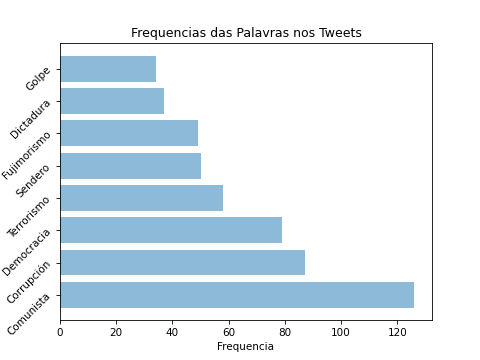

In [30]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

palavras = ["comunista", "corrupcion", "democracia", "terrorismo", 
            "sendero", "fujimorismo", "dictadura", "golpe"]
pos = np.arange(len(palavras))
contagem = [lista_de_palavras.count(i) for i in palavras]

plt.barh(pos, contagem, align = "center", alpha = 0.5)
plt.yticks(pos, ["Comunista", "Corrupción", "Democracia", "Terrorismo", 
                 "Sendero", "Fujimorismo", "Dictadura", "Golpe"], rotation = 45)
plt.xlabel("Frequencia")
plt.title("Frequencias das Palavras nos Tweets")
plt.show()

Podemos observar que o termo que mais causa debate na população é a palavra "comunista", seguida da palavra "corrupción".

**Dispersão Léxica de Palavras**

<IPython.core.display.Javascript object>


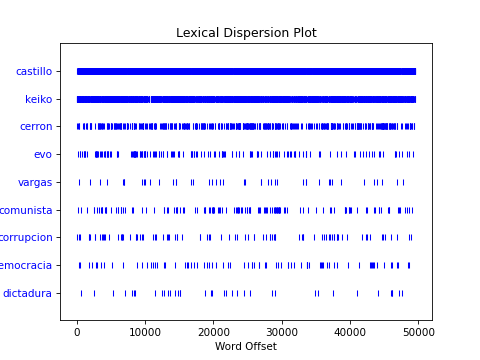

In [31]:
%matplotlib notebook

texto = nltk.Text(lista_de_palavras)
texto.dispersion_plot(["castillo", "keiko", "cerron", "evo", "vargas", "comunista", "corrupcion", "democracia", 
                       "dictadura"])

Podemos observar que, apesar de não ser candidato, Vladimir Cerrón é um personagem muito envolvido nesse segundo turno presidencial, em um nível comparável ao dos candidatos. O ex-presidente de Bolivia, Evo Morales, está também ativo nessas eleições, enquanto que o nobel de Literatura, Vargas Llosa, não ressoa tanto quanto dias atrás, quando ele expressou seu apoio à candidatura de Keiko Fujimori por considerá-la o "mal menor". A população do Twitter está mais preocupada com um possível comunismo do que com a corrupção que representa o Fujimorismo.